#                                SUPERMARKET PROJECT

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize']= (10, 7)
sns.set_style('darkgrid')

In [2]:
%matplotlib inline

In [3]:
df = pd.read_excel("Part_A STATSTICS AND DATA MODELLING COURSEWORK.xlsx",engine='openpyxl')

## Data Description

In [4]:
df.shape

(101, 9)

The data contains 109 rows number and 9 columns number

In [5]:
df.head()

,customer.id,express.no.transactions,express.total.spend,superstore.no.transactions,superstore.total.spend,gender,income,affluency,Region
0,1668.0,54,1559.20,60,30874.62,Female,18901.724734,Mid,West Midlands
1,1827.0,59,619.05,78,36466.45,Male,24464.981612,High,North West
2,3003.0,59,211.50,91,45903.40,Male,31263.210081,High,North West
3,4398.0,58,1118.04,70,32175.17,Male,19742.126261,Low,Yorkshire & Humber
4,5055.0,47,1318.61,62,31109.30,Male,16165.819721,Mid,London


### Statistical Summary

#### Measure of Location: Mean, Median, Mode and Spread: Standard Variation, Variance etc. of variables

In [6]:
df['income'].describe()

count    1.010000e+02
mean     4.957427e+04
std      2.467379e+05
min      5.793800e+03
25%      2.023542e+04
50%      2.590023e+04
75%      3.062797e+04
max      2.503501e+06
Name: income, dtype: float64

In [7]:
df['income'].describe()

count    1.010000e+02
mean     4.957427e+04
std      2.467379e+05
min      5.793800e+03
25%      2.023542e+04
50%      2.590023e+04
75%      3.062797e+04
max      2.503501e+06
Name: income, dtype: float64

In [8]:
df['express.no.transactions'].describe()

count     101.000000
mean      100.475248
std       500.130095
min         0.000000
25%        41.000000
50%        52.000000
75%        62.000000
max      5074.000000
Name: express.no.transactions, dtype: float64

In [9]:
df['superstore.total.spend'].describe()

count    1.010000e+02
mean     7.707882e+04
std      3.835569e+05
min      3.000228e+04
25%      3.229539e+04
50%      3.646645e+04
75%      4.217209e+04
max      3.892480e+06
Name: superstore.total.spend, dtype: float64

In [10]:
df['superstore.no.transactions'].describe()

count     101.000000
mean      149.683168
std       744.813909
min        22.000000
25%        66.000000
50%        74.000000
75%        86.000000
max      7559.000000
Name: superstore.no.transactions, dtype: float64

##### Creating Dummy Variable for Gender and Region Variables

Dummy variables were created for Female from "Gender" variable and also for London from "Region" variable. 


The respective statistical summaries were made afterwards from the dummy variables created.

In [11]:
df['gender']= df['gender'].map({'Female': 1, 'Male':0})
df['gender'].describe()

count    100.000000
mean       0.580000
std        0.496045
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: gender, dtype: float64

In [12]:
df_region= pd.get_dummies(df['Region'])
df_region.head()

,0,Central,Central England,East,East Midlands,London,North East,North West,South East,South West,West Midlands,Yorkshire & Humber
0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0,0,0,0


In [13]:
for col in df_region.columns:
    print(df_region[col].describe())

count    101.000000
mean       0.009901
std        0.099504
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: 0, dtype: float64
count    101.000000
mean       0.009901
std        0.099504
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Central, dtype: float64
count    101.000000
mean       0.019802
std        0.140014
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Central England, dtype: float64
count    101.000000
mean       0.059406
std        0.237562
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: East, dtype: float64
count    101.000000
mean       0.029703
std        0.170613
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: East Midlands, dtype: float64
count    101.000000
mean       0.168317
std  

#### Discussing the meaning of the quartiles of the variable "income"

In [14]:
df['income'].describe()

count    1.010000e+02
mean     4.957427e+04
std      2.467379e+05
min      5.793800e+03
25%      2.023542e+04
50%      2.590023e+04
75%      3.062797e+04
max      2.503501e+06
Name: income, dtype: float64

Based on the quartiles values of the variable 'income', it shows that 25% of the customer of both stores average less than 21K in terms of their respective incomes; 50% of the customers average less than 26K while 75% of the customers average less than 31K in terms of their respective income with no peculiarity as to their gender.

#### Comparing the spending pattern of Superstores to Express stores

In [15]:
compare_total_spend= pd.DataFrame(index= ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'])
compare_total_spend['Express']= df['express.total.spend'].describe()
compare_total_spend['Superstore']= df['superstore.total.spend'].describe()
compare_total_spend.head(10)

,Express,Superstore
count,101.000000,1.010000e+02
mean,1653.380396,7.707882e+04
std,8273.445820,3.835569e+05
min,0.000000,3.000228e+04
25%,266.730000,3.229539e+04
50%,621.600000,3.646645e+04
75%,1118.040000,4.217209e+04
max,83495.710000,3.892480e+06


Based on the information provided above it clearly shows the discrepancies in the spending pattern of the customers of both stores. It can be inferred from the information that Express store could be categorised as a store that retails low priced goods while those of the Superstore are luxury goods and services. 

Based on the mean value, it shows the average spending of those in Express store compare to their counterpart at the Superstore with the spending at an average of 46 times those at the Express store.

The spending pattern will make sense depending on the factors of locality, goods and services provided in the respective stores, the class of residents that reside in the respective stores locality.

#### Percentage of Female consumers and London consumers from the data sample.

In [16]:
df['gender'].value_counts(normalize= True)

1.0    0.58
0.0    0.42
Name: gender, dtype: float64

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


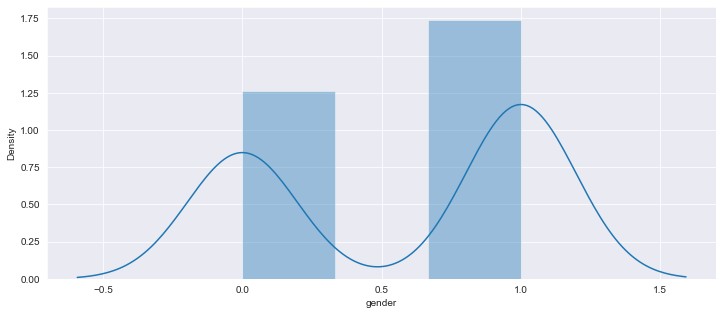

In [23]:
sns.distplot(df['gender'])
sns.set_style('darkgrid')
plt.rcParams['figure.figsize']= (16, 9)

58% of both stores consumers are Female consumers

In [18]:
df['Region'].value_counts(normalize= True)

South East            0.198020
London                0.168317
Yorkshire & Humber    0.148515
North West            0.138614
West Midlands         0.108911
East                  0.059406
South West            0.059406
North East            0.049505
East Midlands         0.029703
Central England       0.019802
Central               0.009901
0                     0.009901
Name: Region, dtype: float64

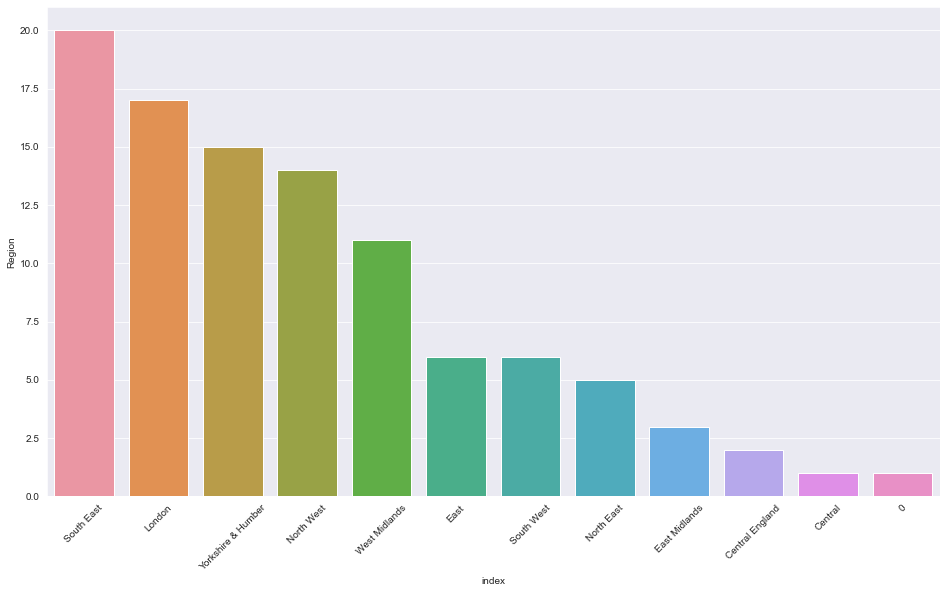

In [19]:
sns.barplot(x= 'index', y= 'Region', data= df['Region'].value_counts().reset_index() )
plt.xticks(rotation= 45)

sns.set_style('darkgrid')
plt.rcParams['figure.figsize']= (12, 5)

17% of the both stores' consumers are London consumers

#### Average total spending between females and males in superstores

In [20]:
df.groupby('gender').mean()['superstore.total.spend']

gender
0.0    37937.069524
1.0    39640.058621
Name: superstore.total.spend, dtype: float64

#### Average total spending between Londoners and non-Londoners in express stores

In [21]:
trans_reg= {'West Midlands': 0, 'North West': 0, 'Yorkshire & Humber': 0, 'London': 1,
             'East': 0, 'South East': 0, 'South West': 0, 'North East': 0, 'Central': 0,
             'East Midlands': 0, 'Central England': 0, 'None': 0}
df['Region']= df['Region'].map(trans_reg)

In [22]:
df.groupby('Region').mean()['express.total.spend']

Region
0.0     751.053614
1.0    1244.603529
Name: express.total.spend, dtype: float64

The average total spending of the females and males at the superstores shows that female consumers spend more at the store when comapre to their male counterpart. The superstores has been adjudged from previous data analysis to be of luxury goods and services providers as such it can be deduced that females spend more on luxury goods and services comapre to their male counterpart.



The average total spending of Londoners compare to those who are not Londoners dictate for a fact that Londoners spend more at the Express stores compare to the non-Londoners. Though the Londoners are not the major consumers but they have significant percentage of consumerswhen compare with their counterparts.
In similar vein as to the comparison of male and female consumers. The Express stores have been adjudged as the stores that provides low priced goods and services as such it can be deduced from the analysis that consumers from Londoners are more inclined towards patronizing low priced goods and services.